In [1]:
from Utils import *

Using TensorFlow backend.


In [5]:
hyper = array([[-0.55,-0.33,0.36,0.61,0.75,0.61],        #Suggested 's' values
               [0.3,0.3,0.3,0.0003,0.01,0.3],            #Max. deviation of the s values.
               [1,1,1,0,0,1],                            #Orientation of the given curve
               [-6.07,-27.93,-6.93,65.97,45.00,30.34],   #k vals
               [1.04,1.32,0.94,0.88,1.28,-1.09],         #A vals 
               [0,0,0,0,0,0]])                           #freezeS

#Hide warnings when logging
from tensorflow.compat.v1.logging import set_verbosity,ERROR
set_verbosity(ERROR)

stoichiom = 'La0.9'
#Load all data for this stoichiometry
names = !ls data/{stoichiom}*txt
dfs = {}
d=0
for name in names:
    df,NormPrms = LoadDF(name,dom=(210,600))            #Load data
    #DFiHyper = TransferHyper(df,hyper)    #Transfer model
    dfs[name] = (df,d,NormPrms)
    print(f"{name} successfully loaded.")

3429 points dropped
1112 points dropped
data/La0.9Ca0.1NiO310C.txt successfully loaded.
2584 points dropped
803 points dropped
data/La0.9Ca0.1NiO315C.txt successfully loaded.
5129 points dropped
1607 points dropped
data/La0.9Ca0.1NiO35C.txt successfully loaded.
3975 points dropped
1280 points dropped
data/La0.9Ca0.1NiO38C.txt successfully loaded.


In [6]:
#Load all trained models:
PRMS = {}
for name in names:
    name = name.split('/')[-1]
    if name[:5]=='La0.9':
        file=!ls models/Finals/{name}*M0*
        PRMS[name] = LoadModel(file[0],hyper)

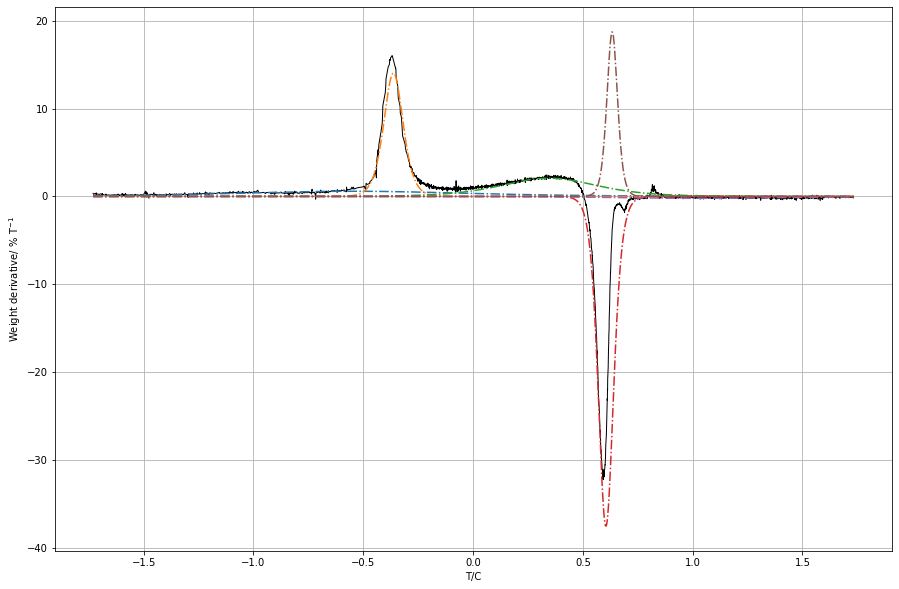

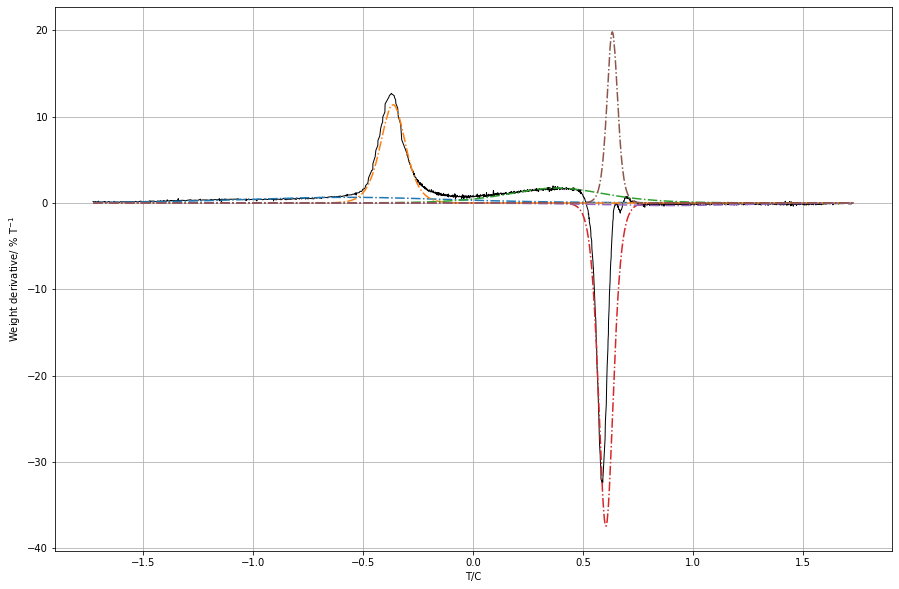

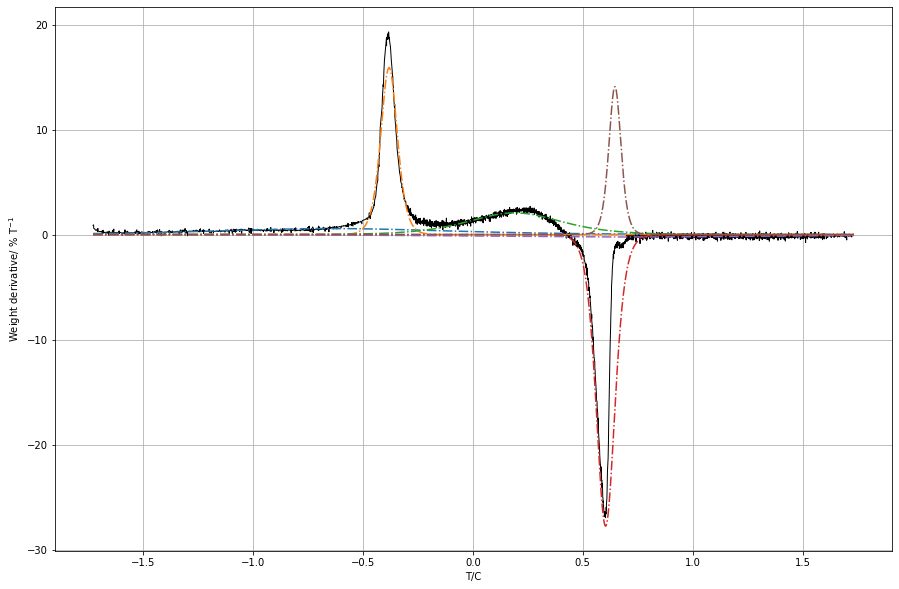

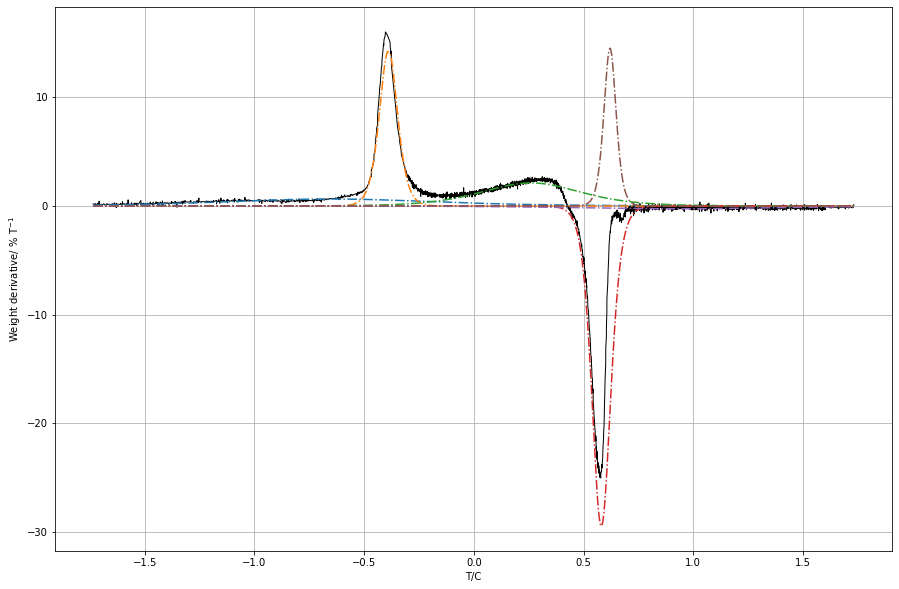

In [8]:
for name in names:
    df = dfs[name][0]
    prms = PRMS[name.split('/')[-1]]
    plot_derivs(df,prms,6)